<a href="https://colab.research.google.com/github/gorzanskik-ai/statistics/blob/main/02_probits/01_mean_median_mode_skew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/statistics/data/yellow_tripdata_2021-05.parquet"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
taxi = pd.read_parquet(path, engine='auto', columns=['trip_distance'], storage_options=None, use_nullable_dtypes=False)
taxi.query('trip_distance > 0 and trip_distance < 10', inplace=True)

In [15]:
taxi.head()

,trip_distance
0,0.70
1,1.40
2,5.70
3,3.04
4,4.04


In [16]:
taxi.describe()

,trip_distance
count,2.326530e+06
mean,2.288487e+00
std,1.838722e+00
min,1.000000e-02
25%,1.070000e+00
50%,1.700000e+00
75%,2.830000e+00
max,9.990000e+00


In [57]:
taxi_mean = taxi['trip_distance'].mean()    #średnia
taxi_median = taxi['trip_distance'].median()    #mediana
taxi_mode = taxi['trip_distance'].mode().iloc[0]    #dominanata

In [58]:
taxi_skew = taxi['trip_distance'].skew()    #skośność
taxi_skew

1.850666322448088

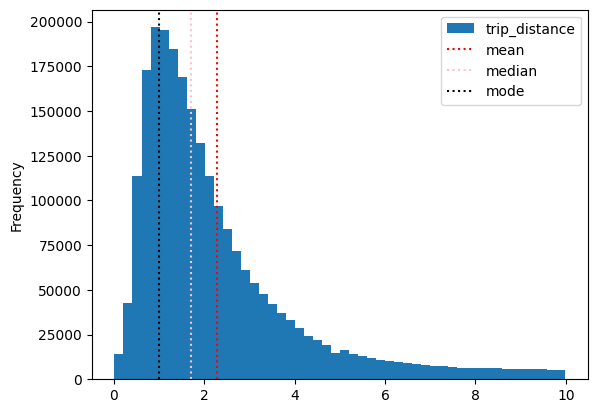

In [47]:
taxi.plot.hist(column='trip_distance', bins=50)
plt.axvline(taxi_mean, color='red', linestyle='dotted', label='mean')
plt.axvline(taxi_median, color='pink', linestyle='dotted', label='median')
plt.axvline(taxi_mode, color='black', linestyle='dotted', label='mode')
plt.legend(['trip_distance', 'mean', 'median', 'mode'])
plt.show()

probe to population

In [52]:
means = []
medians = []
modes = []
for i in range(1, 101):
    probe = taxi.sample(frac=i/100)

    mean = probe.mean()
    median = probe.median()
    mode = probe.mode().iloc[0]

    means.append(mean)
    medians.append(median)
    modes.append(mode)

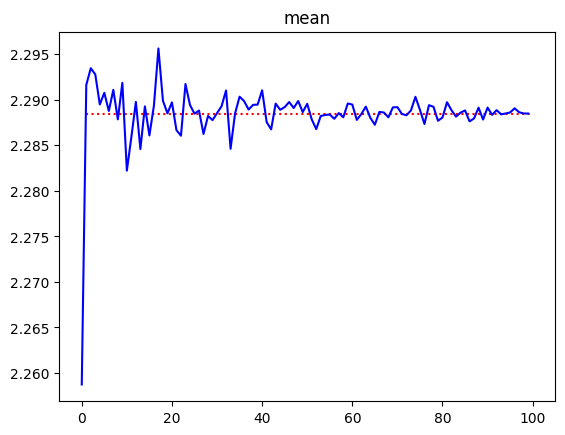

In [53]:
plt.hlines(xmin=1, xmax=100, y=taxi_mean, linestyles='solid', colors='red', linestyle='dotted')
plt.plot(means, color='blue')
plt.title('mean')
plt.show()

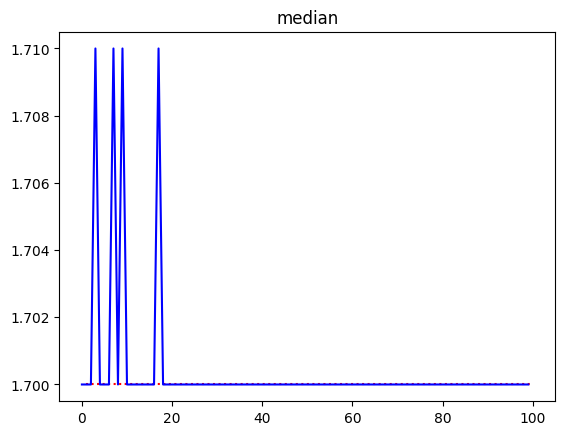

In [54]:
plt.hlines(xmin=1, xmax=100, y=taxi_median, linestyles='solid', colors='red', linestyle='dotted')
plt.plot(medians, color='blue')
plt.title('median')
plt.show()

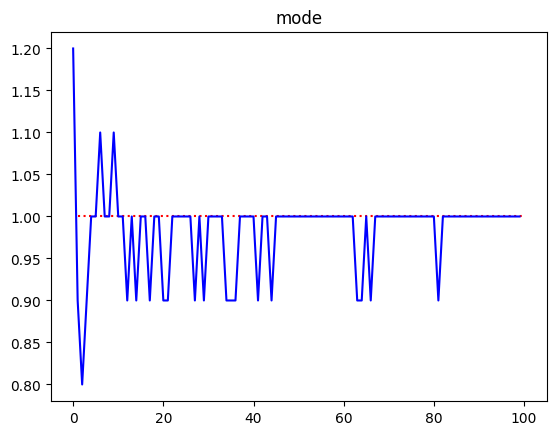

In [55]:
plt.hlines(xmin=1, xmax=100, y=taxi_mode, linestyles='solid', colors='red', linestyle='dotted')
plt.plot(modes, color='blue')
plt.title('mode')
plt.show()